In [1]:
% load_ext autoreload
% autoreload 2
import os
import sys

import matplotlib as mpl

sys.path.append('../..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from util import DATASET_PATH
from viz import *
import viz

RESULTS_PATH = oj(os.path.dirname(DATASET_PATH), 'results')

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

num_datasets 11 9


In [3]:
# run comparison aggregations
!python3 "../../02_aggregate_comparisons.py"

	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/credit/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/ionosphere/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/german-credit/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/juvenile/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/satellite-image/train-test
../../02_aggregate_comparisons.py:50: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/echo-months/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/abalone/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/heart/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/breast-tumor/train-test
	processing path 

# overarching plots


100%|██████████| 9/9 [00:05<00:00,  1.58it/s]


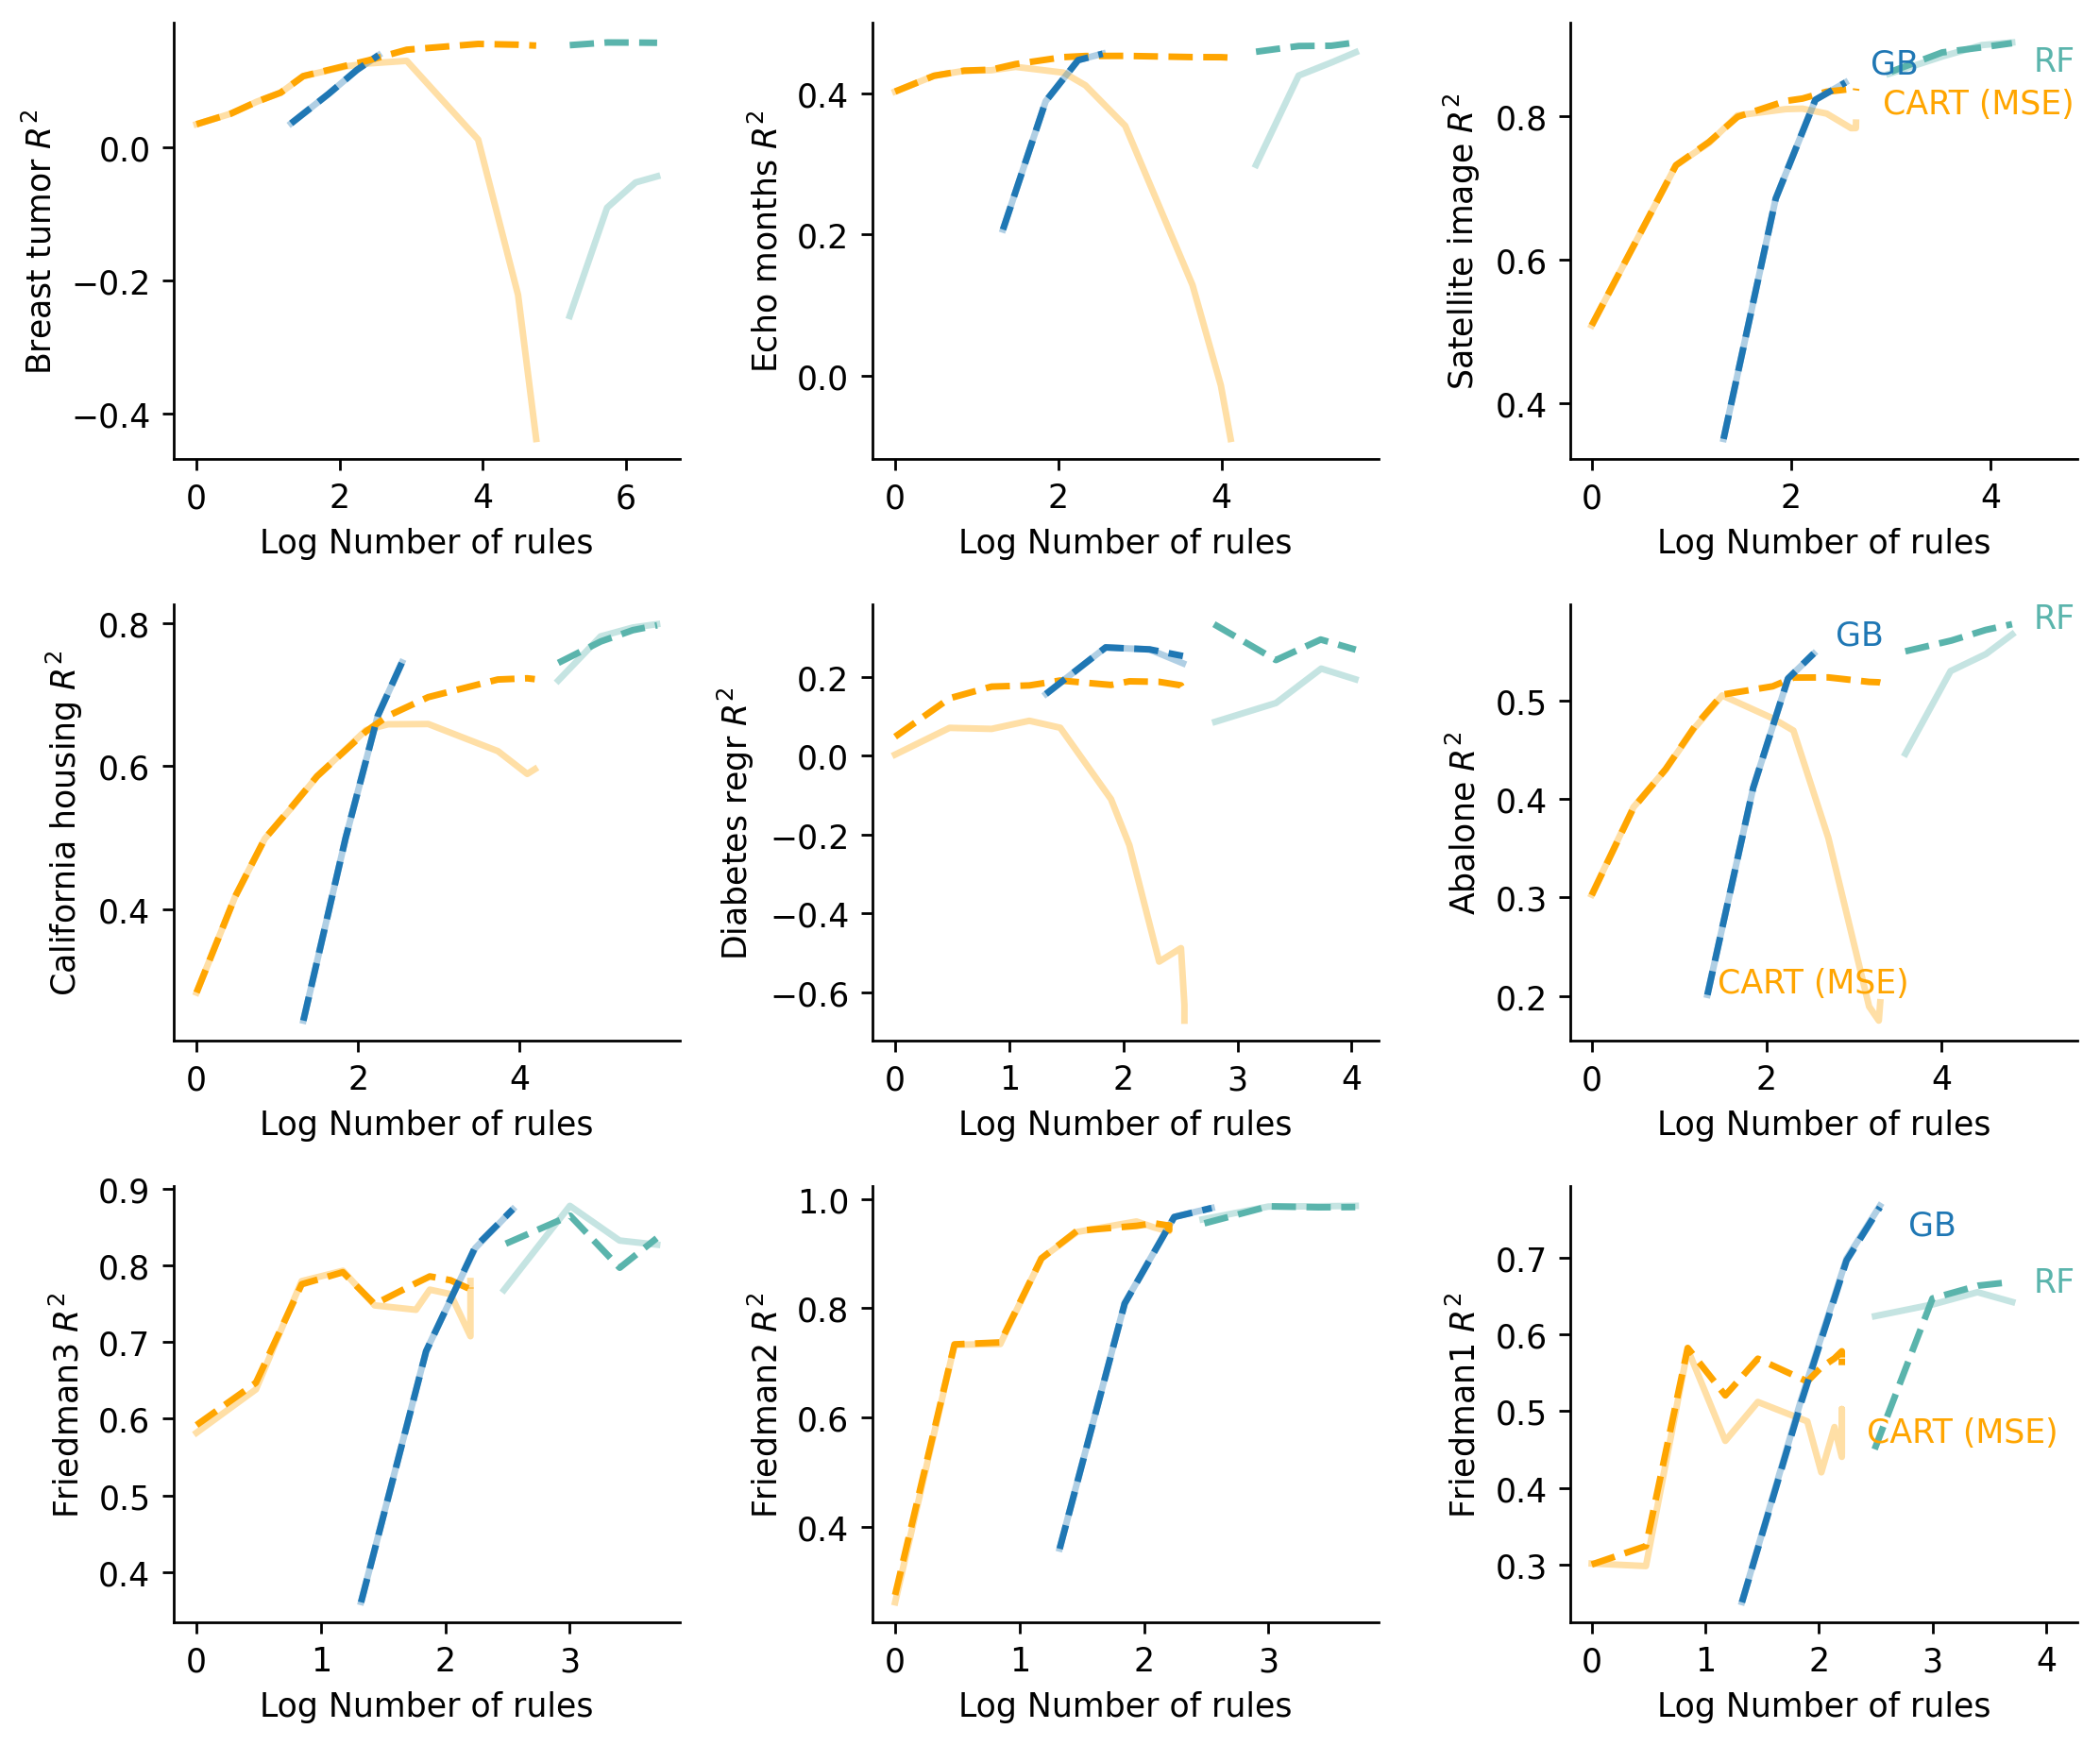

In [2]:
viz.plot_comparisons(metric='r2', datasets=DATASETS_REGRESSION,  # len(DATASETS_REGRESSION)
                     models_to_include=['ShrunkCART', 'CART_(MSE)',
                                        'Shrunk_Random_Forest', 'Random_Forest',
                                        'Shrunk_Gradient_Boosting', 'Gradient_Boosting'],
                     save_name='shrinkage-regression-reg', data_type='reg_data')


In [ ]:
viz.plot_comparisons(metric='rocauc', datasets=DATASETS_CLASSIFICATION,
                     models_to_include=['CART', 'Random_Forest', 'Gradient_Boosting'],
                     save_name='shrinkage-classification')


In [ ]:
# viz.plot_comparisons(metric='r2', datasets=DATASETS_REGRESSION,
#                 models_to_include=['ShrunkCART', 'CART_(MSE)',
#                                    'Shrunk_Random_Forest', 'Random_Forest',
#                                    'Shrunk_Gradient_Boosting', 'Gradient_Boosting'],
#                      save_name='shrinkage-regression-low', data_type='low_data')

